In [2]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
file_path = "/Users/laurencekuhlburger/Documents/crisprseq/benchmarking/test_wo_crisprcleanr/bagel2/precision_recall/Brunello_RepA_Dropout_A375,Brunello_RepB_Dropout_A375_vs_Brunello_pDNA.tsv"
file_essentials = "//Users/laurencekuhlburger/Documents/crisprseq/benchmarking/ROC_curves/data/essential_non_essential_genes/essential_genes.txt"
file_nonessentials ="/Users/laurencekuhlburger/Documents/crisprseq/benchmarking/ROC_curves/data/essential_non_essential_genes/NEGv1.txt"

df = pd.read_csv(file_path, sep='\t')
df_essentials = pd.read_csv(file_essentials,sep='\t')
df_nonessentials = pd.read_csv(file_nonessentials, sep='\t')

In [22]:
df_nonessentials.head()


,GENE,HGNC_ID,ENTREZ_ID
0,ABCG8,HGNC:13887,64241.0
1,ACCSL,HGNC:34391,390110.0
2,ACTL7A,HGNC:161,10881.0
3,ACTL7B,HGNC:162,10880.0
4,ACTL9,HGNC:28494,284382.0


In [23]:
true_positives = df_essentials['Gene']
true_negatives = df_nonessentials['GENE']

In [24]:
df['True_Label'] = df['Gene'].isin(true_positives).astype(int)

In [25]:
y_true = df['True_Label']
y_score = df['BF']
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

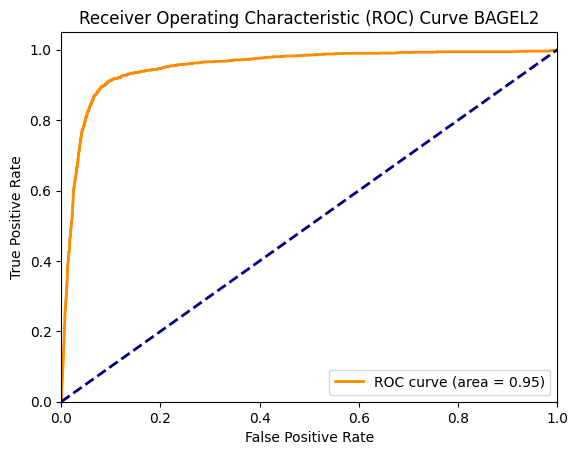

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve BAGEL2')
plt.legend(loc="lower right")
plt.show()

In [27]:
df['True_Label'] = df['Gene'].isin(true_positives).astype(int)

In [28]:
def assign_label(gene):
    if gene in true_positives.unique():
        return 1
    elif gene in true_negatives.unique():
        return 0
    else:
        return None

In [30]:
file_path = "/Users/laurencekuhlburger/Documents/crisprseq/benchmarking/test_wo_crisprcleanr/mageck/mle/Brunello_RepA_Dropout_A375,Brunello_RepB_Dropout_A375_vs_Brunello_pDNA/Brunello_RepA_Dropout_A375,Brunello_RepB_Dropout_A375_vs_Brunello_pDNA.gene_summary.txt"

true_positives = df_essentials['Gene']
true_negatives = df_nonessentials['GENE']

df_mageck = pd.read_csv(file_path, sep='\t')
df_mageck['True_Label'] = df_mageck['Gene'].apply(assign_label)

df_mageck_filtered = df_mageck.dropna(subset=['True_Label']) 
df_mageck_filtered.loc[:,'Brunello_RepA_Dropout_A375_Brunello_RepB_Dropout_A375_vs_Brunello_pDNA|beta'] *=(-1)

#df_mageck_filtered.to_csv("df_mageck_filtered.csv")


y_true_mageck = df_mageck_filtered['True_Label']
y_score_mageck = df_mageck_filtered['Brunello_RepA_Dropout_A375_Brunello_RepB_Dropout_A375_vs_Brunello_pDNA|beta']
fpr_mageck, tpr_mageck, _ = roc_curve(y_true_mageck, y_score_mageck)
roc_auc_mageck = auc(fpr_mageck, tpr_mageck)



In [31]:
file_path = "/Users/laurencekuhlburger/Documents/crisprseq/benchmarking/ROC_curves/data/vispr_wo_CNV/test/mle.gene_summary.txt"
df_vispr = pd.read_csv(file_path, sep='\t')
df_vispr['True_Label'] = df_vispr['Gene'].apply(assign_label)

df_vispr_filtered = df_vispr.dropna(subset=['True_Label']) 
df_vispr_filtered.loc[:,'A375_SKIN|beta'] *=(-1)

y_true_vispr = df_mageck_filtered['True_Label']
y_score_vispr = df_mageck_filtered['Brunello_RepA_Dropout_A375_Brunello_RepB_Dropout_A375_vs_Brunello_pDNA|beta']
fpr_vispr, tpr_vispr, _ = roc_curve(y_true_vispr, y_score_vispr)
roc_auc_mageck = auc(fpr_vispr, tpr_vispr)

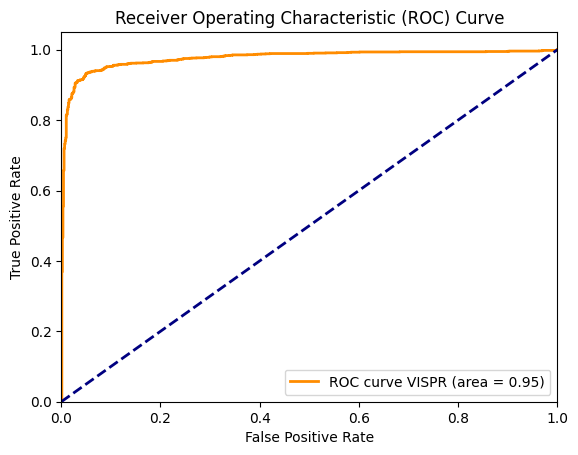

In [17]:
plt.figure()
plt.plot(fpr_vispr, tpr_vispr, color='darkorange', lw=2, label='ROC curve VISPR (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

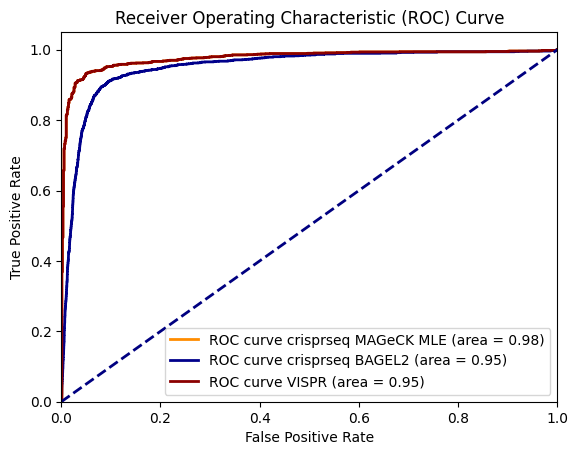

In [18]:
plt.figure()
plt.plot(fpr_mageck, tpr_mageck, color='darkorange', lw=2, label='ROC curve crisprseq MAGeCK MLE (area = %0.2f)' % roc_auc_mageck)
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve crisprseq BAGEL2 (area = %0.2f)' % roc_auc)
plt.plot(fpr_vispr, tpr_vispr, color='darkred', lw=2, label='ROC curve VISPR (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()